# How to calculate greenhouse gas growth rates

***

## Overview:

This How-To demonstrates how to calculate the growth rate, also known as rate of change, for greenhouse gases. This example uses atmospheric methane data from AIRS (AIRX3STM) and the GES DISC Giovanni visualization service. Giovanni service is used to compute a time-series of area averaged atmospheric methane concentrations (in csv format). The time series can also be computed using python or ArcGIS. The rate of change is computed by taking the difference of the area averaged concentrations.

## Example:

**Example data:** AIRS+AMSU L3 (V6) monthly standard product ([AIRX3STM](https://disc.gsfc.nasa.gov/datasets/AIRX3STM_V006/summary?keywords=airx3stm))

**Example variable used:** CH4_VMR_A

**Estimated time to complete procedure:** 20min

**Example figures:** Figures 1 and 2 were created in Python. Methane growth rates were calculated using time-series area averaged methane concentrations computed in Giovanni.


## Procedure:
**Data use caution:** The domain used should be sufficiently large enough to reduce the noise associated with local source and sink processes. The variability generated from local methane source and sink processes could be larger than the methane growth rate, potentially leading to incorrect conclusions about methane growth rates. Continental scale or larger domains should help reduce this issue. Similar issues may also arise using AIRS methane data with high temporal resolution (< 1 month). One month data resolution is recommended.


- Go to https://giovanni.gsfc.nasa.gov/giovanni/

    1. Select ‘CH4’ under the ‘Measurements’ drop down menu on the left.

    2. Select ‘monthly’ under the ‘Temporal Resolutions’ drop down menu on the left.

    3. Select the ‘Methane, Mole Fraction in Air (Daytime/Ascending) (AIRX3STM v006)’ variable.

    4. Select 500 hPa under the drop down menu to the right of the variable name in the ‘Vert. Slice’ column.

    5. Enter ‘2002-09’ for the beginning date under the ‘Select Date Range’ field.

    6. Enter ‘2016-09’ for the ending date under the ‘Select Date Range’ field.

    7. Input ‘-180,0,180,90’ in the ‘Select Region (Bounding Box or Shape)’ field to select the northern hemisphere.

    8. Under the ‘Time Series:’ plot option, select ‘Area-Averaged’.

    9. Click the ‘Plot Data’ in the bottom right of the screen.

    10. After the plot appears, select the ‘Downloads’ tab under the ‘Browse History’ tree on the left of the screen.

        1\. Click the .csv file link under ‘ASCII CSV’ to download AIRS northern hemisphere averaged methane at 500 hPa from 2002-09 to 2016-09.

- Month-to-month growth rates can be calculated by subtracting a previous month’s methane concentration from the next month (Figure 1).

    1. Example: the growth rate for October 2002 would be the methane concentration for October 2002 minus September 2002 over the change in time. This will produce units of ppb/month.

The first step is to import the required Python libraries. If any of the following import commands fail, check the local Python environment and install any missing packages. These lines will be necessary to run the rest of the cells:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as df
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

Read in the data and recognize the data as dates and numeric values and calculate the month-to-month growth rates of methane concentration:

In [2]:
# Read in data
data = pd.read_csv("g4.areaAvgTimeSeries.AIRX3STM_006_CH4_VMR_A.500hPa.20020901-20160930.180W_90S_180E_90N.csv", skiprows=9, usecols=[0,1], names=['Time','Mean AIRS Methane'])

# Read the times as dates and the methane concentrations as numeric values
data['Time'] = pd.to_datetime(data['Time'])
data['Mean AIRS Methane'] = pd.to_numeric(data['Mean AIRS Methane'])
# Restrict the range and calculate the month-to-month growth rates
dateRange = (data['Time'] >= '2003-1-1') & (data['Time'] <= '2016-7-1') 
calcRange = (data['Time'] >= '2002-12-1') & (data['Time'] <= '2016-7-1')
range1data= data.loc[calcRange]
valuesRange1 = range1data['Mean AIRS Methane'].values
subtractedMonthly = [x-y for x, y in zip(valuesRange1[1:], valuesRange1)]   
data = data.loc[dateRange]

data['Mean AIRS Methane'] = subtractedMonthly

Plot the month-to-month growth rates calculated in the previous cell:

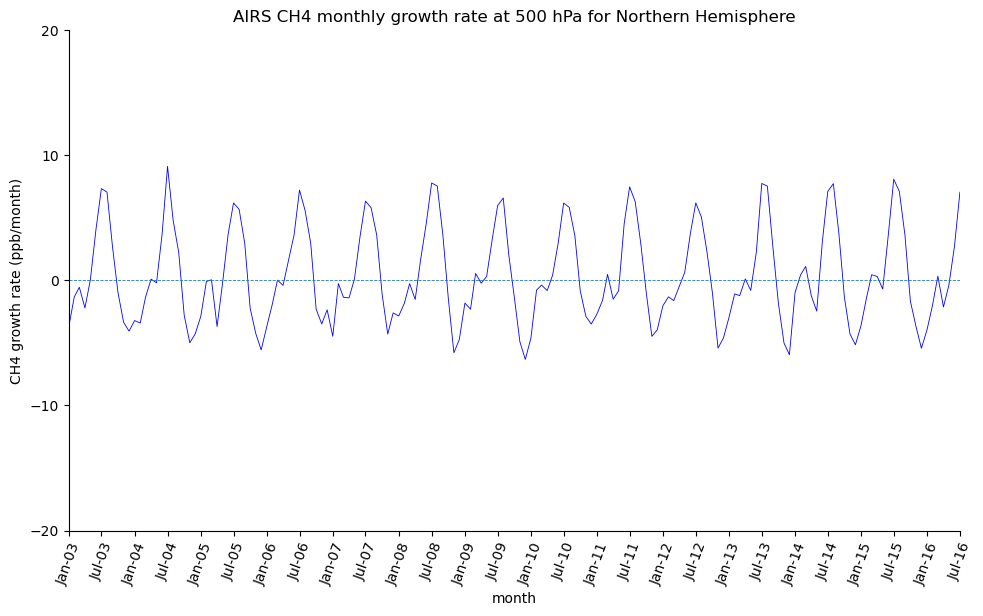

In [3]:
ttl = "AIRS CH4 monthly growth rate at 500 hPa for Northern Hemisphere"

# Format the dates and change the image size
datefmt = df.DateFormatter("%b-%y")
fig, ax = plt.subplots()
fig.set_size_inches(11.5, 6.5)

# Plot the dates and calculated CH4 growth rates
ax.plot(data['Time'].values, data['Mean AIRS Methane'].values,linewidth=0.6,color='blue')
ax.xaxis.set_major_formatter(datefmt)

# Add axes labels and graph title
ax.set(xlabel="month", ylabel="CH4 growth rate (ppb/month)")
ax.set(title=ttl)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add center line and format x and y axis ticks
plt.hlines(0,'2003-1-1', '2016-7-1', linestyle='dashed', linewidth=0.6)
plt.ylim(-20, 20)
plt.xlim('2003-1-1', '2016-7-1')
plt.xticks(['2003-1-1', '2016-7-1'],rotation=70)
plt.yticks([-20, -10, 0, 10, 20])
ax.xaxis.set_major_locator(df.MonthLocator(interval=6))

figure1 = plt.figure(1)

Save the figure as a PNG:

In [4]:
figure1.savefig('AIRS_CH4_mon_500hpa.png', format='png', dpi=360)

**Figure 1.** AIRS methane month-to-month growth rate at 500 hPa.

*** 

- Yearly growth rates can be calculated by taking the monthly methane concentrations for a given month, and subtracting the methane concentration from the same month the year before (Figure 2).

    1. Example: the yearly growth rate for January 2005 would be the methane concentration for January 2005 minus January 2004 over the change in time. This will produce units of ppb/year. (method from Rigby et al. 2008, Geophysical Research Letters; Simpson et al. 2006,Geophysical Research Letters).

Read in the data and recognize the data as dates and numeric values and calculate the yearly growth rates of methane concentration:

In [5]:
# Read in data
data = pd.read_csv("g4.areaAvgTimeSeries.AIRX3STM_006_CH4_VMR_A.500hPa.20020901-20160930.180W_90S_180E_90N.csv", skiprows=9, usecols=[0,1], names=['Time','Mean AIRS Methane'])

# Read the times as dates and the methane concentrations as numeric values
data['Time'] = pd.to_datetime(data['Time'])
data['Mean AIRS Methane'] = pd.to_numeric(data['Mean AIRS Methane'])

# Restrict the range and calculate the month-to-month growth rates
dateRange = (data['Time'] >= '2004-1-1') & (data['Time'] <= '2016-7-1') # The range of dates being calculated
calcRange = (data['Time'] >= '2003-1-1') & (data['Time'] <= '2015-7-1') # The range including the previous year for calculations
range1data = data.loc[dateRange]
range2data = data.loc[calcRange]
valuesRange1 = range1data['Mean AIRS Methane'].values
valuesRange2 = range2data['Mean AIRS Methane'].values
subtractedMonthly = valuesRange1
subtractedMonthly = [x-y for x, y in zip(valuesRange1, valuesRange2)]   
data = data.loc[dateRange]
data['Mean AIRS Methane'] = subtractedMonthly

Plot the yearly growth rates calculated in the previous cell:

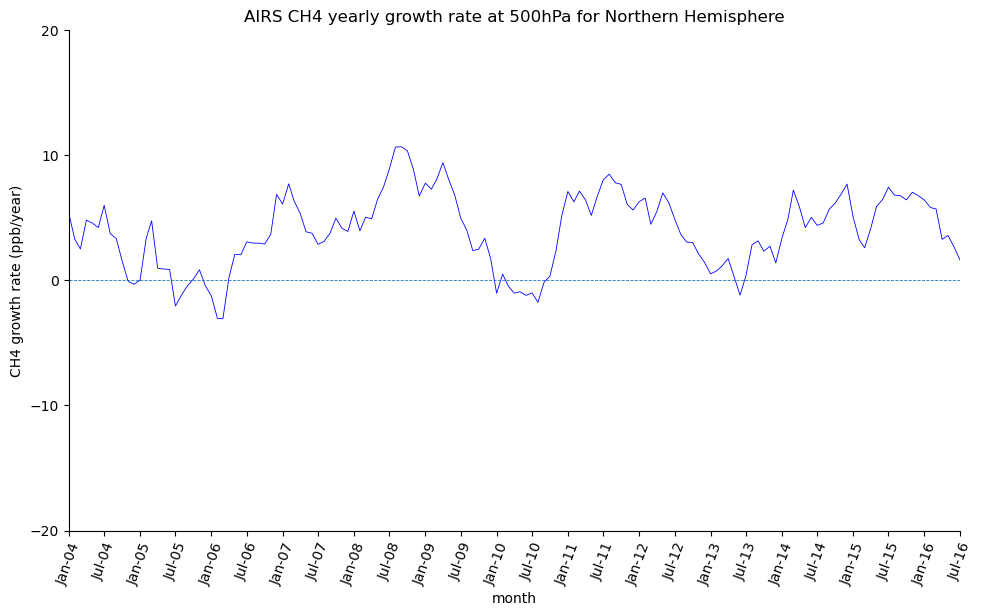

In [6]:
ttl = "AIRS CH4 yearly growth rate at 500hPa for Northern Hemisphere"

# Format the dates and change the image size
datefmt = df.DateFormatter("%b-%y")
fig, ax = plt.subplots()
fig.set_size_inches(11.5, 6.5)

# Plot the dates and calculated CH4 growth rates
ax.plot(data['Time'].values, data['Mean AIRS Methane'].values,linewidth=0.6,color='blue')
ax.xaxis.set_major_formatter(datefmt)

# Add axes labels and graph title
ax.set(xlabel="month", ylabel="CH4 growth rate (ppb/year)")
ax.set(title=ttl)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add center line and format x and y axis ticks
plt.hlines(0,'2004-1-1', '2016-7-1', linestyle='dashed', linewidth=0.6)
plt.ylim(-20, 20)
plt.xlim('2004-1-1', '2016-7-1')
plt.xticks(rotation=70)
plt.yticks([-20, -10, 0, 10, 20])
ax.xaxis.set_major_locator(df.MonthLocator(interval=6))

figure2 = plt.figure(1)

Save the figure as a PNG:

In [7]:
figure2.savefig('AIRS_CH4_yr_500hpa.png', format='png', dpi=360)

**Figure 2.** AIRS methane yearly growth rate at 500hPa.

***

- Seasonal growth rates can be calculated using the "Time Series: Seasonal" service to compute area averaged concentrations for each season. Season-to-season or yearly seasonal growth rates could then be computed as described above.

<font size="1">THE SUBJECT FILE IS PROVIDED "AS IS" WITHOUT ANY WARRANTY OF ANY KIND, EITHER EXPRESSED, IMPLIED, OR STATUTORY, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTY THAT THE SUBJECT FILE WILL CONFORM TO SPECIFICATIONS, ANY IMPLIED WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, OR FREEDOM FROM INFRINGEMENT, ANY WARRANTY THAT THE SUBJECT FILE WILL BE ERROR FREE, OR ANY WARRANTY THAT DOCUMENTATION, IF PROVIDED, WILL CONFORM TO THE SUBJECT FILE. THIS AGREEMENT DOES NOT, IN ANY MANNER, CONSTITUTE AN ENDORSEMENT BY GOVERNMENT AGENCY OR ANY PRIOR RECIPIENT OF ANY RESULTS, RESULTING DESIGNS, HARDWARE, SOFTWARE PRODUCTS OR ANY OTHER APPLICATIONS RESULTING FROM USE OF THE SUBJECT FILE. FURTHER, GOVERNMENT AGENCY DISCLAIMS ALL WARRANTIES AND LIABILITIES REGARDING THIRD-PARTY SOFTWARE, IF PRESENT IN THE SUBJECT FILE, AND DISTRIBUTES IT "AS IS."